# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
all_data=soup.find_all('tr',class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
id=[]
terrestrial_date=[]
sol=[]
ls=[]
month=[]
min_temp=[]
pressure=[]

for row_data in all_data:
    cells = row_data.find_all('td')
    id.append(cells[0].text.strip())
    terrestrial_date.append(cells[1].text.strip())
    sol.append(cells[2].text.strip())
    ls.append(cells[3].text.strip())
    month.append(cells[4].text.strip())
    min_temp.append(cells[5].text.strip())
    pressure.append(cells[6].text.strip())


In [7]:
data = {
    'id': id,
    'terrestrial_date': terrestrial_date,
    'sol': sol,
    'ls': ls,
    'month': month,
    'min_temp': min_temp,
    'pressure': pressure
}
mars_temp_df = pd.DataFrame(data)

In [8]:
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = pd.to_numeric(mars_temp_df['sol'], downcast='integer')
mars_temp_df['ls'] = pd.to_numeric(mars_temp_df['ls'], downcast='integer')
mars_temp_df['month'] = pd.to_numeric(mars_temp_df['month'], downcast='integer')
mars_temp_df['min_temp']=pd.to_numeric(mars_temp_df['min_temp'], downcast='float')
mars_temp_df['pressure']=pd.to_numeric(mars_temp_df['pressure'], downcast='float')

In [11]:
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int16         
 3   ls                1867 non-null   int16         
 4   month             1867 non-null   int8          
 5   min_temp          1867 non-null   float32       
 6   pressure          1867 non-null   float32       
dtypes: datetime64[ns](1), float32(2), int16(2), int8(1), object(1)
memory usage: 53.0+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
month_date_count = mars_temp_df.groupby('month')['terrestrial_date'].count().reset_index()
month_date_count.set_index('month', inplace=True)
month_date_count

,terrestrial_date
month,
1,174
2,178
3,192
4,194
5,149
6,147
7,142
8,141
9,134


In [13]:
non_dull_data = len(mars_temp_df['terrestrial_date'].dropna().unique())
non_dull_data

1867

In [14]:
month_avg_temp = mars_temp_df.groupby('month')['min_temp'].mean().reset_index()
month_avg_temp.columns=['month','average temp']
month_avg_temp.set_index('month', inplace=True)
month_avg_temp

,average temp
month,
1,-77.160919
2,-79.932587
3,-83.307289
4,-82.747421
5,-79.308723
6,-75.299316
7,-72.281693
8,-68.382980
9,-69.171638


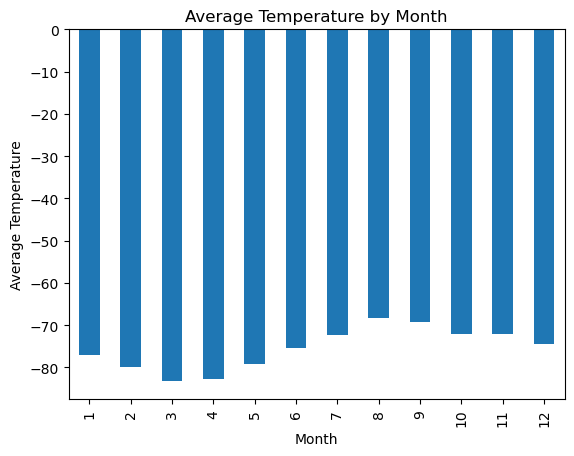

In [15]:
month_avg_temp.plot(kind='bar', legend=False)
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()

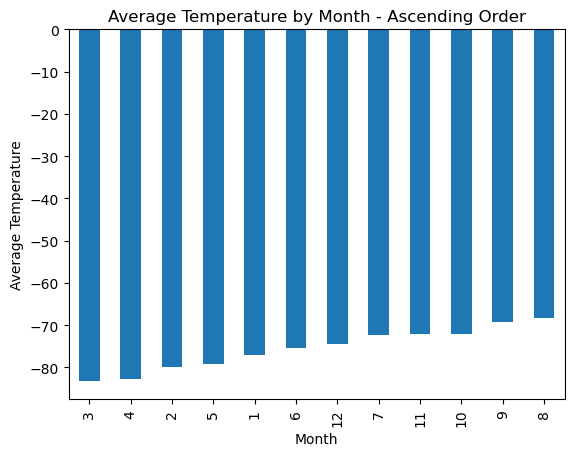

The coldest month is month # 3
The coldest month is month # 8


In [16]:
month_avg_temp_sorted = month_avg_temp.sort_values(by='average temp', ascending=True)
month_avg_temp_sorted.plot(kind='bar', legend=False)
plt.title('Average Temperature by Month - Ascending Order')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()

coldest_month = month_avg_temp_sorted['average temp'].idxmin()
hottest_month = month_avg_temp_sorted['average temp'].idxmax()

print(f"The coldest month is month # {coldest_month}")
print(f"The coldest month is month # {hottest_month}")


In [18]:
month_avg_pressure = mars_temp_df.groupby('month')['pressure'].mean().reset_index()

month_avg_pressure.set_index('month', inplace=True)
month_avg_pressure

,pressure
month,
1,862.488525
2,889.455078
3,877.322937
4,806.329895
5,748.557068
6,745.054443
7,795.105652
8,873.829773
9,913.305969


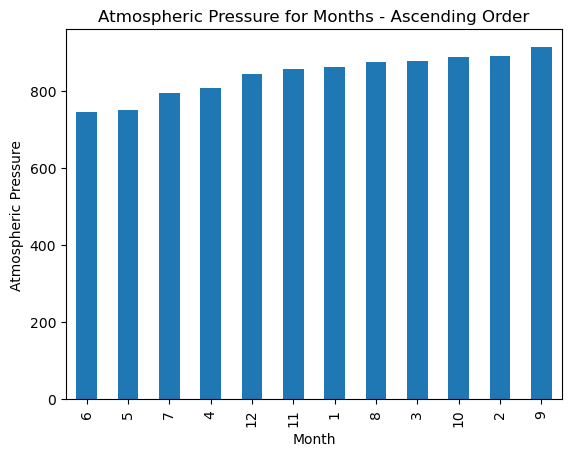

The highest pressure month is month # 6
The lowest pressure month is month # 9


In [19]:
month_avg_pressure_sorted = month_avg_pressure.sort_values(by='pressure', ascending=True)
month_avg_pressure_sorted.plot(kind='bar', legend=False)
plt.title('Atmospheric Pressure for Months - Ascending Order')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

highest_pressure_month = month_avg_pressure_sorted['pressure'].idxmin()
lowest_pressure_month = month_avg_pressure_sorted['pressure'].idxmax()

print(f"The highest pressure month is month # {highest_pressure_month}")
print(f"The lowest pressure month is month # {lowest_pressure_month}")

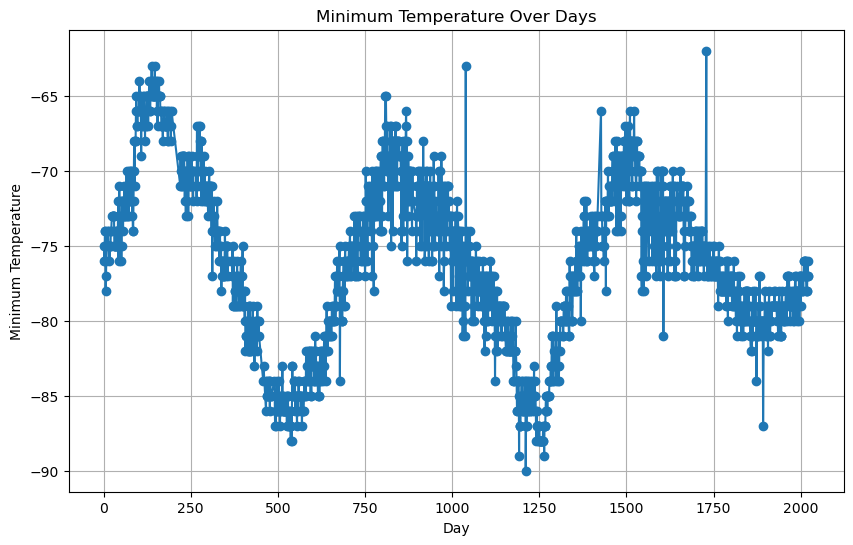

In [20]:
mars_temp_df['day'] = (mars_temp_df['terrestrial_date'] - mars_temp_df['terrestrial_date'].min()).dt.days + 1
mars_temp_df.head()

plt.figure(figsize=(10, 6))
plt.plot(mars_temp_df['day'], mars_temp_df['min_temp'], marker='o', linestyle='-')
plt.title('Minimum Temperature Over Days')
plt.xlabel('Day')
plt.ylabel('Minimum Temperature')
plt.grid(True)
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
mars_temp_df.to_csv('mars_temp_df.csv', index=False)

In [22]:
browser.quit()